In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('apps.csv')
df1.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df1.shape

(9659, 14)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [5]:
df1.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
df1.duplicated().sum()

np.int64(0)

In [7]:
df1.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [8]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].median())
df1['Size'] = df1['Size'].fillna(df1['Size'].median())

In [10]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [11]:
df1.shape

(9659, 13)

In [12]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [13]:
df1['Price'] = df1['Price'].str.replace('$','')
df1['Price'] = df1['Price'].astype(float)

In [14]:
df1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [15]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
df1['Installs'] = df1['Installs'].str.replace(',','')
df1['Installs'] = df1['Installs'].str.replace('+','')
df1['Installs'] = df1['Installs'].astype(int)


In [17]:
df1['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [18]:
df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 981.1+ KB


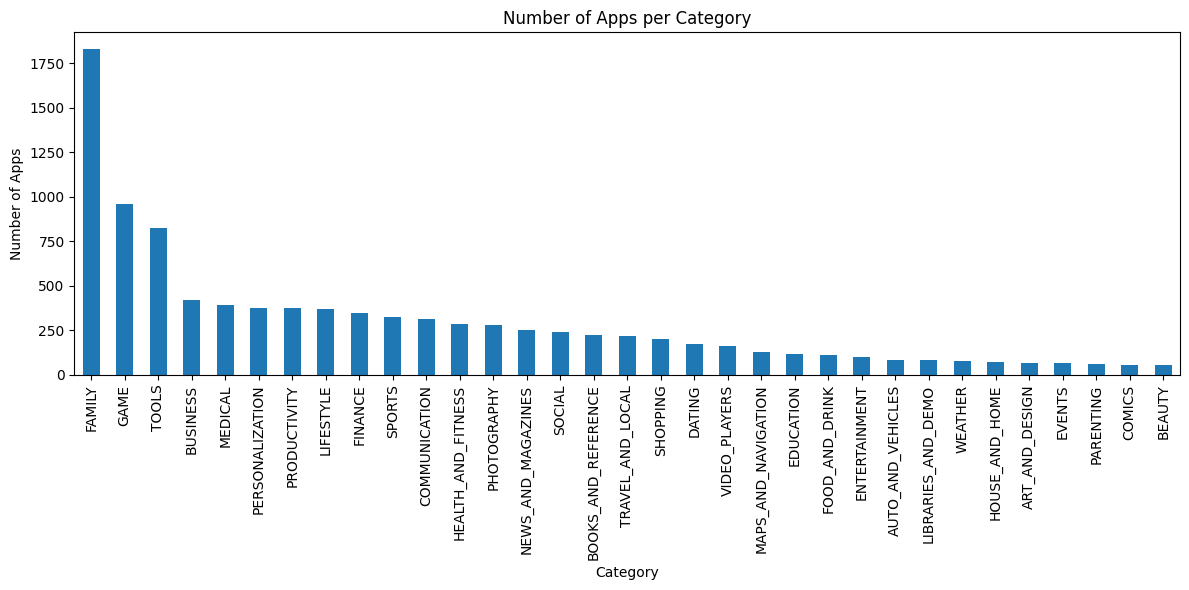

In [20]:
plt.figure(figsize=(12,6))
df1['Category'].value_counts().plot(kind='bar')
plt.title('Number of Apps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


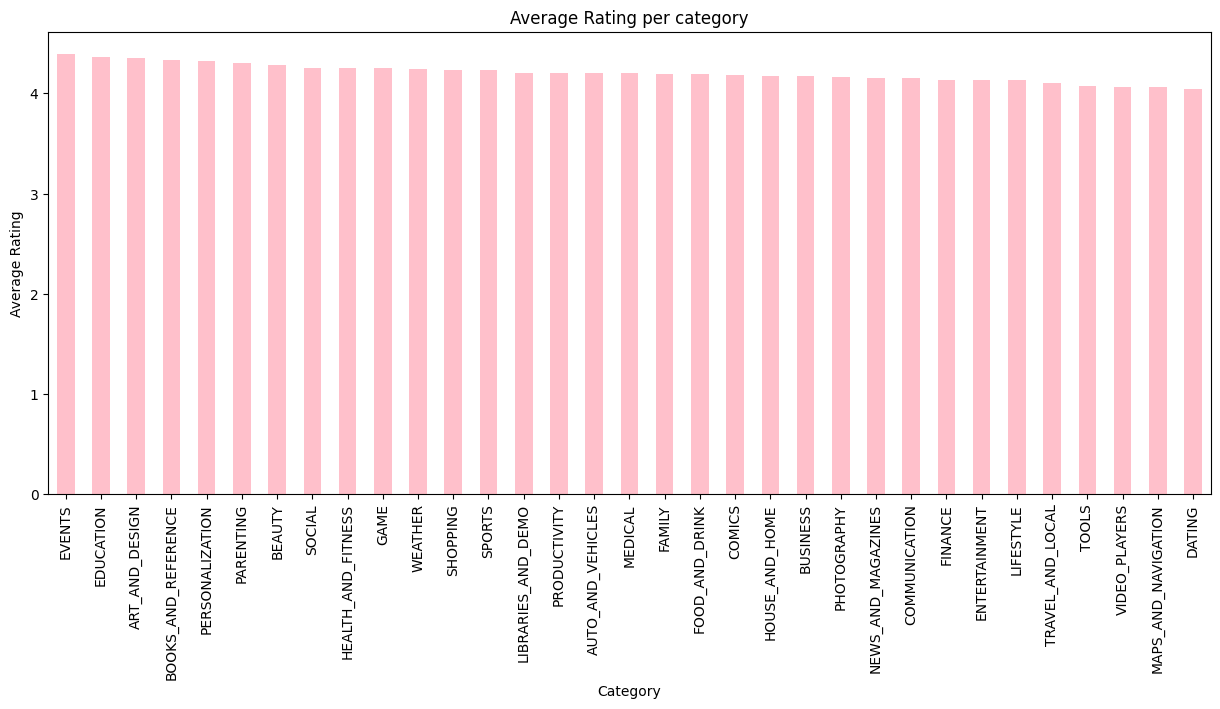

In [21]:
plt.figure(figsize=(15, 6))
most_rated = df1.groupby('Category')['Rating'].mean().sort_values(ascending=False)
most_rated.plot(kind='bar', color='pink')
plt.title('Average Rating per category')
plt.ylabel('Average Rating')
plt.show()

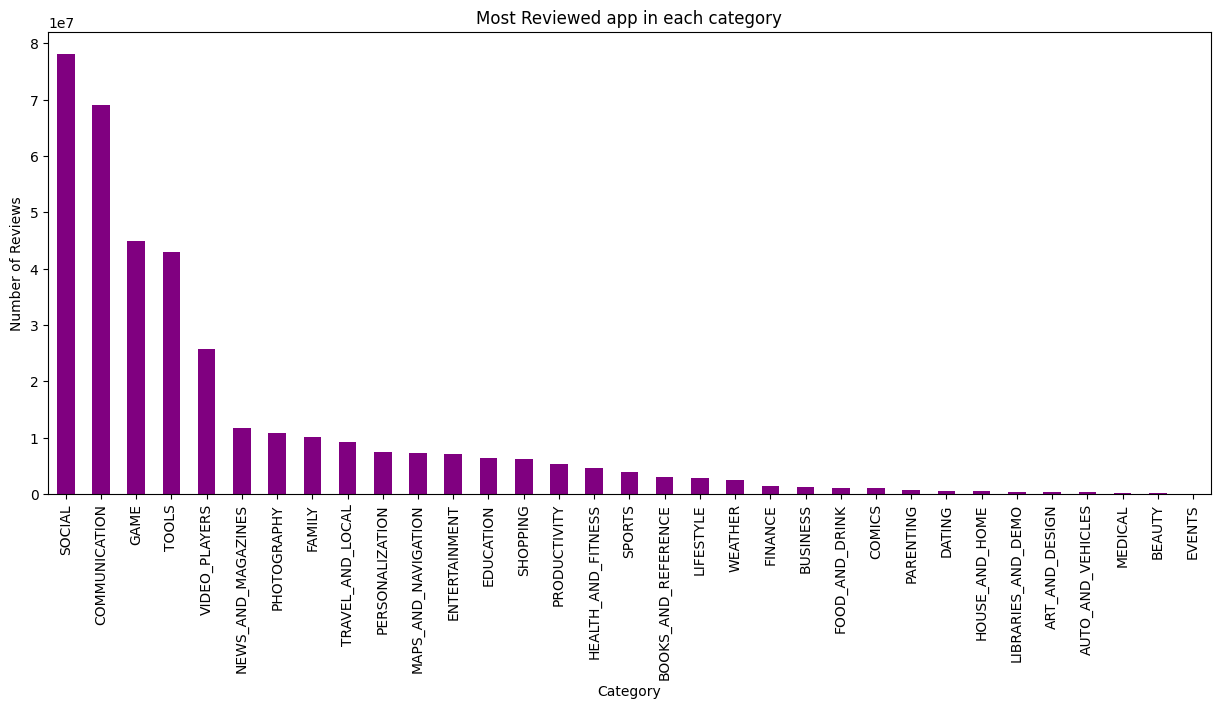

In [22]:
plt.figure(figsize=(15, 6))
most_reviewed = df1.groupby('Category')['Reviews'].max().sort_values(ascending=False)
most_reviewed.plot(kind='bar', color='purple')
plt.title('Most Reviewed app in each category')
plt.ylabel('Number of Reviews')
plt.show()

<Axes: title={'center': 'Rating Distribution: Free vs Paid Apps'}, xlabel='Type', ylabel='Rating'>

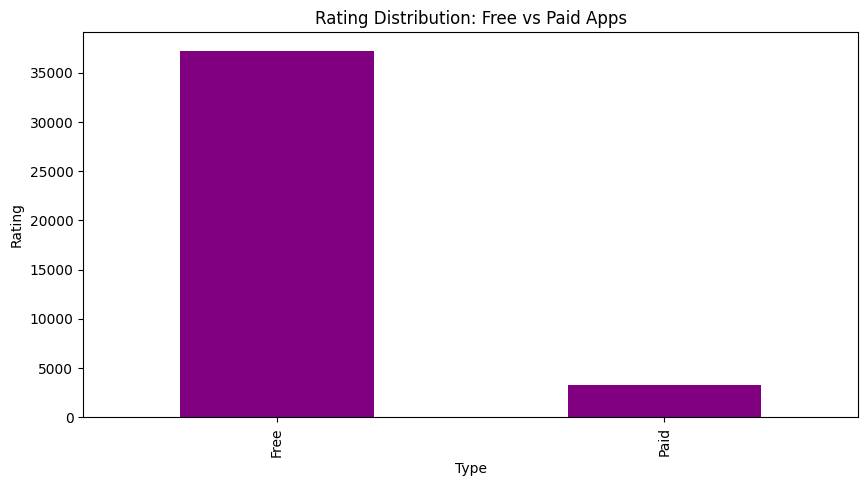

In [23]:
plt.figure(figsize=(10,5))
var = df1.groupby('Type')['Rating'].sum()
plt.title('Rating Distribution: Free vs Paid Apps')
var.plot(kind='bar', xlabel='Type', ylabel='Rating',color='purple')

<Axes: xlabel='Price', ylabel='Installs'>

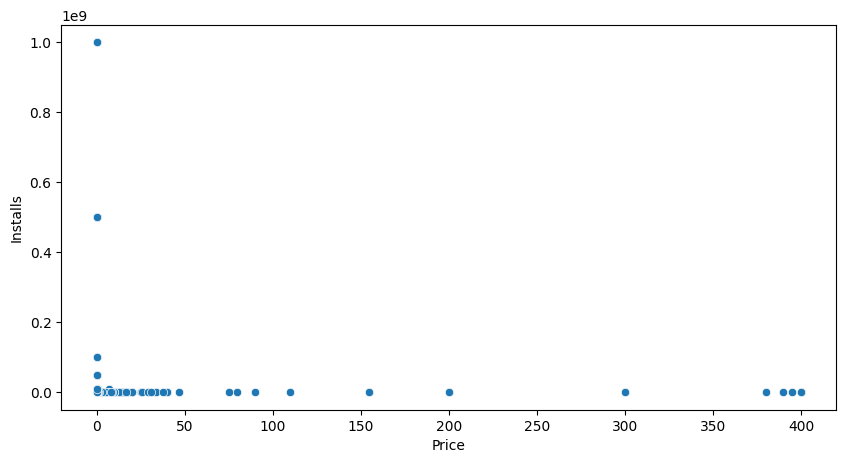

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='Price', y='Installs')

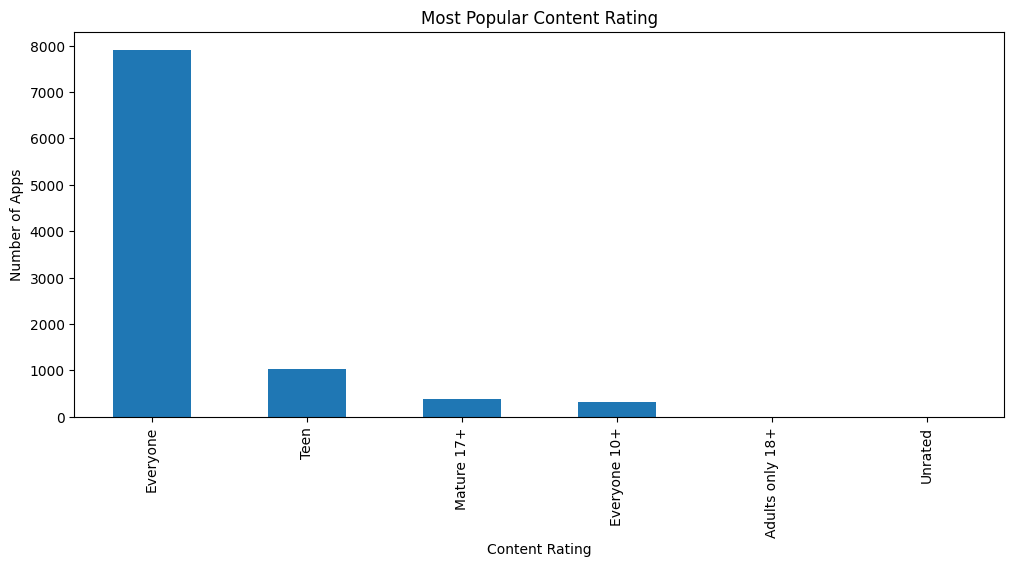

In [25]:
plt.figure(figsize=(12,5))
df1['Content Rating'].value_counts().plot(kind='bar')
plt.title('Most Popular Content Rating')
plt.ylabel('Number of Apps')
plt.show()

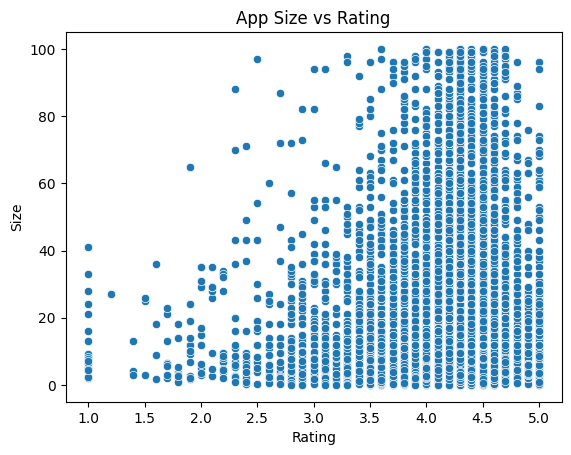

In [26]:
sns.scatterplot(data=df1, x='Rating', y='Size')
plt.title('App Size vs Rating')
plt.show()

In [27]:
df2 = pd.read_csv('user_reviews.csv')
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [29]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [30]:
df2.shape

(64295, 5)

In [31]:
df2.dropna(subset=['Translated_Review' , 'Sentiment', 'Sentiment_Polarity'] ,inplace=True)

In [32]:
df2.shape

(37427, 5)

In [33]:
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [34]:
sentiment_summary = df2.groupby('App').agg({
    'Sentiment_Polarity':'mean',
    'Sentiment_Subjectivity':'mean'
}).reset_index()

In [35]:
merged_df = pd.merge(df1, sentiment_summary, on='App', how='left')

In [36]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.152652,0.64154
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,NaN,NaN


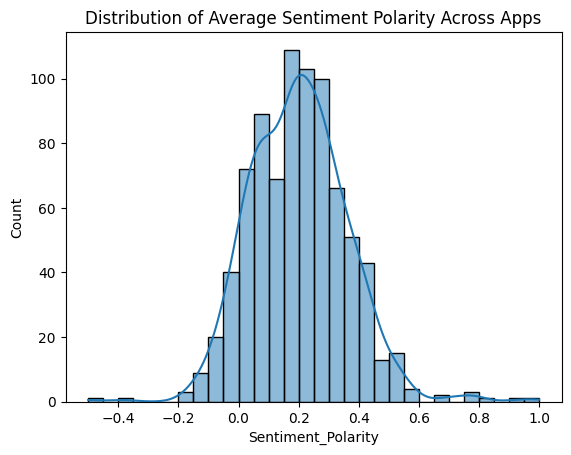

In [37]:
sns.histplot(merged_df['Sentiment_Polarity'].dropna(), bins=30, kde=True)
plt.title('Distribution of Average Sentiment Polarity Across Apps')
plt.show()

<Axes: title={'center': 'Average Sentiment Polarity by Category'}, xlabel='Category', ylabel='Sentiment_Polarity'>

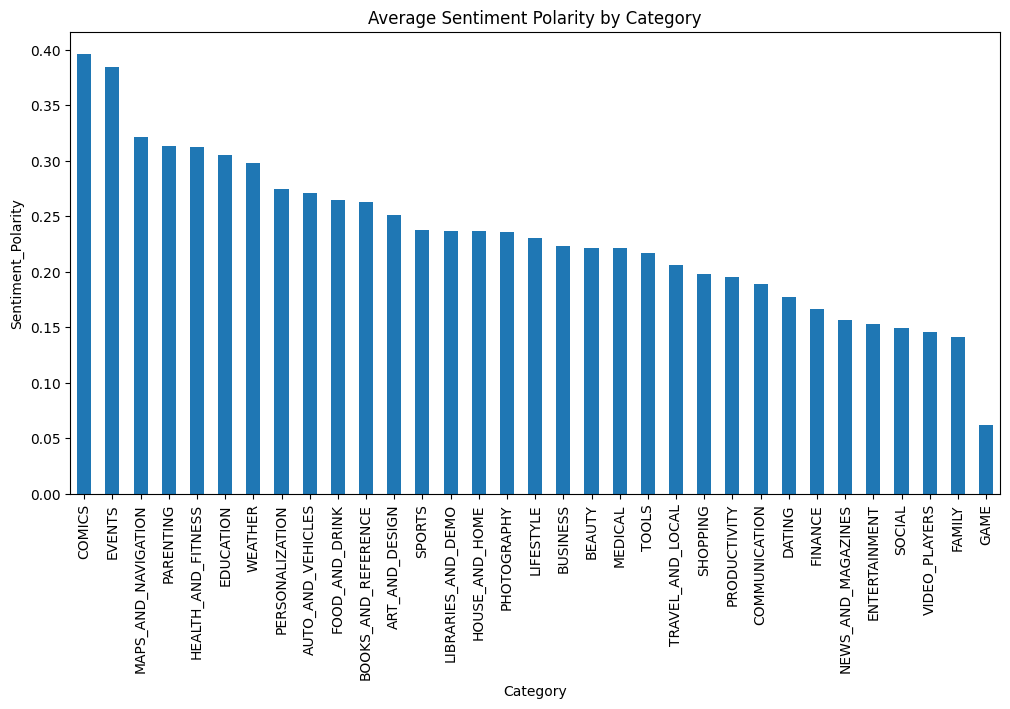

In [38]:
var = merged_df.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)
var.plot(kind='bar', figsize=(12,6), ylabel='Sentiment_Polarity', title='Average Sentiment Polarity by Category')

Text(0.5, 1.0, 'Sentiment Polarity vs App Rating')

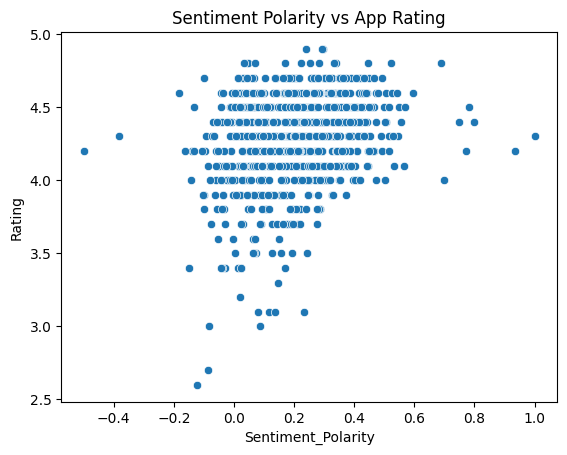

In [39]:
sns.scatterplot(data=merged_df, x='Sentiment_Polarity', y='Rating')
plt.title('Sentiment Polarity vs App Rating')


In [40]:
corr = merged_df.corr(numeric_only=True)

<Axes: >

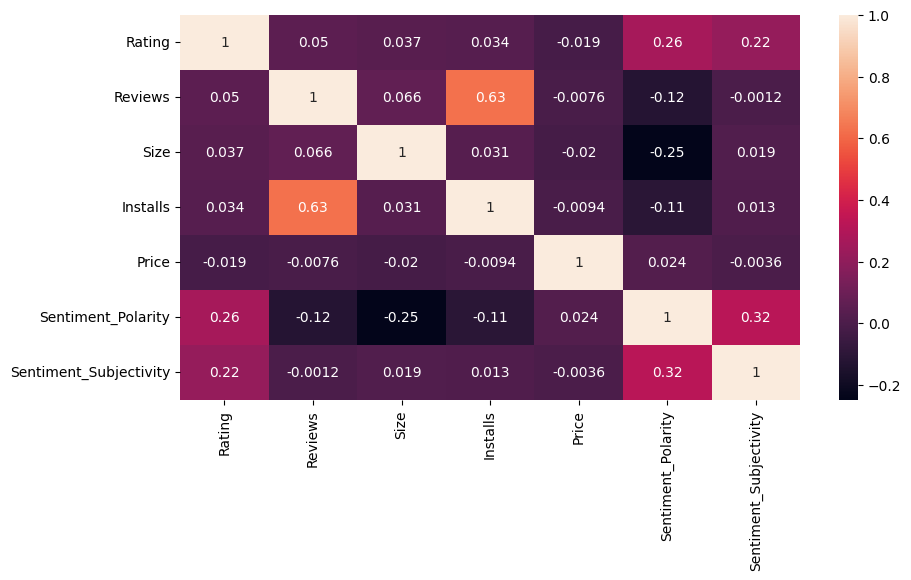

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)

## Insights and Summmary

The top categories by number of apps are:
FAMILY, GAME, and TOOLS.
These categories make up the majority of the Google Play Store, indicating a high level of developer and user interest in entertainment and utility apps.
Niche categories like WEATHER or AUTO & VEHICLES have fewer apps, possibly due to lower demand or specialized use cases.



Based on the boxplot analysis:
Paid apps tend to have slightly higher average ratings than free apps.
However, the number of paid apps is significantly lower, and the difference is not drastic.
Possible reasons:
Paid apps may be more polished, ad-free, or serve niche premium use-cases.
Users might rate paid apps more favorably due to higher expectations or personal investment.



After merging user reviews:
Apps with higher sentiment polarity tend to have higher ratings.
There is a positive correlation between Sentiment_Polarity and Rating, though it is not very strong.
This suggests that user-generated sentiment is a decent predictor of rating, but other factors like functionality, design, or advertising may also affect ratings.



Apps with lower prices (including free) tend to have more installs, especially in categories like COMMUNICATION and SOCIAL.
Rating, Reviews, and Category also influence installs:
Apps with high ratings and many reviews often show higher download numbers.
Popular content ratings like Everyone have broader reach than apps rated Mature 17+ or Teen, which may restrict visibility.

